In [68]:
import numpy as np


In [69]:
from comms.mod_mapping import BPSK, mod_mapper, num_bits_per_symbol
from comms.pulse_shaping import sine_squared_pulse, rect_pulse, pulse_shape
from comms.sources import random_bit_source

In [70]:
import pyaudio

p = pyaudio.PyAudio()

In [71]:
# Audio constants
FS = p.get_default_output_device_info()['defaultSampleRate']
CHUNK = 1024                 # samples per frame
FORMAT = p.get_format_from_width(2, False)     # audio format (2 bytes per sample, signed int)
CHANNELS = 1                 # single channel for microphone
RATE = int(FS)                    # samples per second

In [78]:
## comms parameters
symbol_rate = 0.5e3
constellation = BPSK
fsT = int(FS/symbol_rate)

duration = 10

N_symbols = int(duration * symbol_rate)
N_bits = num_bits_per_symbol(constellation) * N_symbols

#pulse = rect_pulse(fsT) #
pulse = sine_squared_pulse(fsT)

fc = 6e3

In [79]:
bits = random_bit_source(N_bits)
syms = mod_mapper(bits, constellation)
sig = pulse_shape(syms, pulse, fsT)

# frequency shift to fc
tt = np.arange(len(sig)) / FS
sig_fc = np.real(sig * np.exp(2j*np.pi*fc*tt))

# convert sig to np.int16, i.e., 2 byte signed integers to match FORMAT
audio_data = np.int16(2**14 * np.sqrt(fsT) * sig_fc )



In [74]:
stream = p.open(format=FORMAT,
                channels=1,
                rate=RATE,
                output=True)

In [84]:
# need tobytes() to convert numpy array into a sequence of bytes
stream.write(audio_data.tobytes())


In [68]:
stream.stop_stream()
stream.close()
p.terminate()

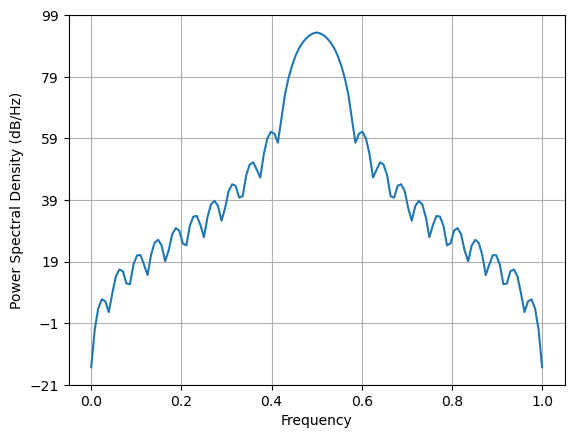

26754

In [53]:
import matplotlib.pyplot as plt
plt.psd(audio_data)
plt.show()

np.max(np.abs(audio_data)) 

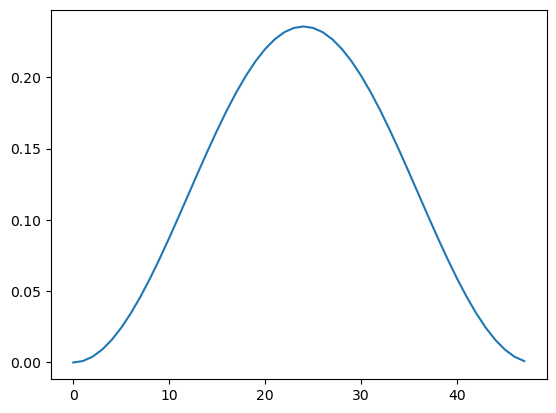

In [49]:
plt.plot(pulse)